In [ ]:
import os
import pandas as pd
import numpy as np
import re
import geopandas as gpd
import matplotlib.pyplot as plt

### Location Plot

In [ ]:
og = pd.read_csv('project_tables/og_geocoded.csv')

In [ ]:
# og['Coordinates_lat_lon'] = 
og['lat'] = og['Coordinates_lat_lon'].apply(lambda x: x.split(',')[0] if pd.isna(x) == False else None).str.replace('(','').astype(float)
og['lon'] = og['Coordinates_lat_lon'].apply(lambda x: x.split(',')[1] if pd.isna(x) == False else None).str.replace(')','').astype(float)

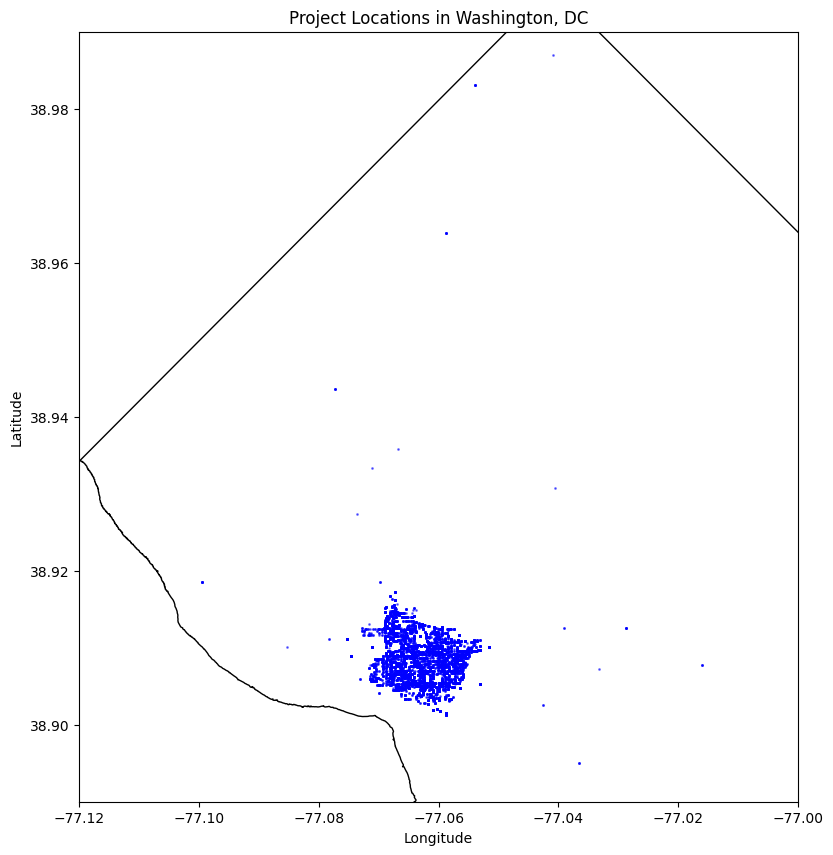

In [ ]:
# Load the shapefile
dc_boundary = gpd.read_file(r'Map_Boundaries\Washington_DC_Boundary.shp')

# Ensure the coordinate reference system is set to latitude and longitude
dc_boundary = dc_boundary.to_crs(epsg=4326)

# Plot the shapefile and the project locations
fig, ax = plt.subplots(figsize=(10, 10))
dc_boundary.plot(ax=ax, color='white', edgecolor='black')

# Plot the project locations
ax.scatter(og['lon'], og['lat'], c='blue', marker='o', alpha=0.5, s=1)

# Set the title and labels
plt.title('Project Locations in Washington, DC')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(-77.12, -77)
plt.ylim(38.89, 38.99)
# Show the plot
plt.show()

In [ ]:
# Load the building footprints shapefile
building_footprints = gpd.read_file(r'Map_Boundaries\Building_Footprints.shp')

# Ensure the coordinate reference system is set to latitude and longitude
building_footprints = building_footprints.to_crs(epsg=4326)

In [16]:
# Filter the building footprints to only include those within the specified boundary
minx, miny, maxx, maxy = -77.08, 38.89, -77.04, 38.99
building_footprints = building_footprints.cx[minx:maxx, miny:maxy]

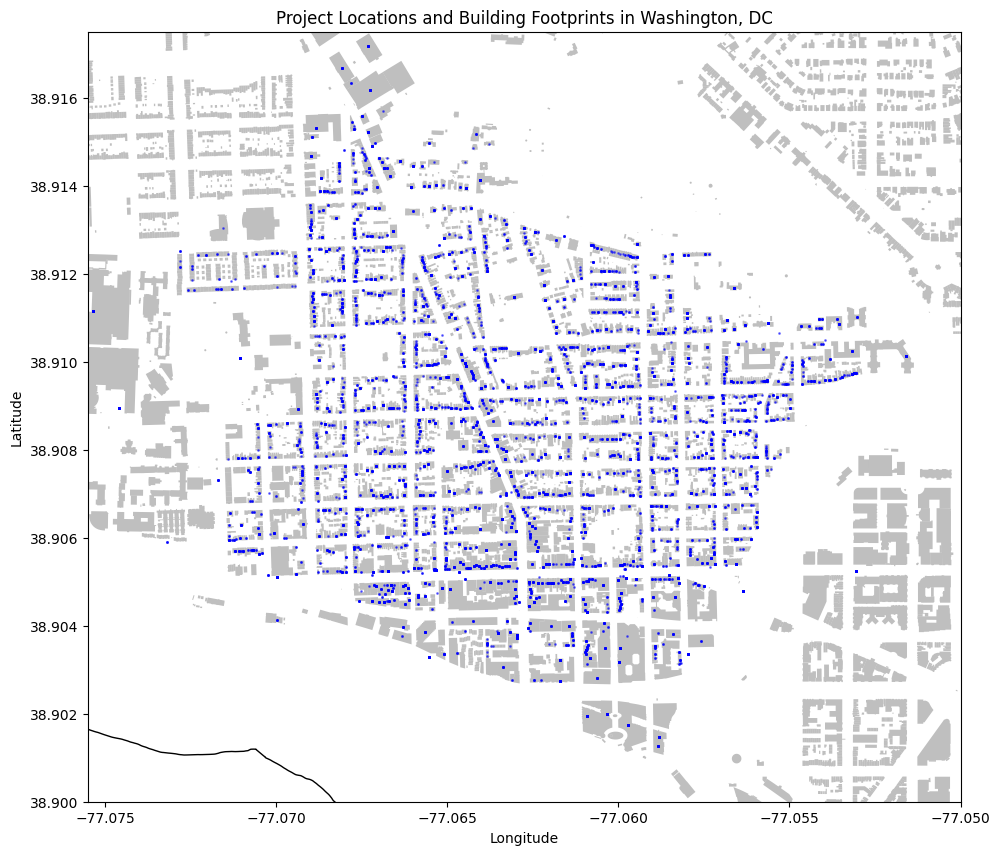

In [ ]:
# Plot the shapefile and the project locations
fig, ax = plt.subplots(figsize=(16, 10))
dc_boundary.plot(ax=ax, color='white', edgecolor='black')

# Plot the building footprints
building_footprints.plot(ax=ax, color='grey', alpha=0.5)

# Plot the project locations
ax.scatter(og['lon'], og['lat'], c='blue', marker='o', alpha=0.5, s=1)

# Set the title and labels
plt.title('Project Locations and Building Footprints in Georgetown Historic District')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(-77.0755, -77.05)
plt.ylim(38.9, 38.9175)

# Show the plot
plt.show()

In [23]:
# Filter the building footprints to only include those within the specified boundary
minx, miny, maxx, maxy = -77.08, 38.89, -77.04, 38.905
waterfront_footprints = building_footprints.cx[minx:maxx, miny:maxy]

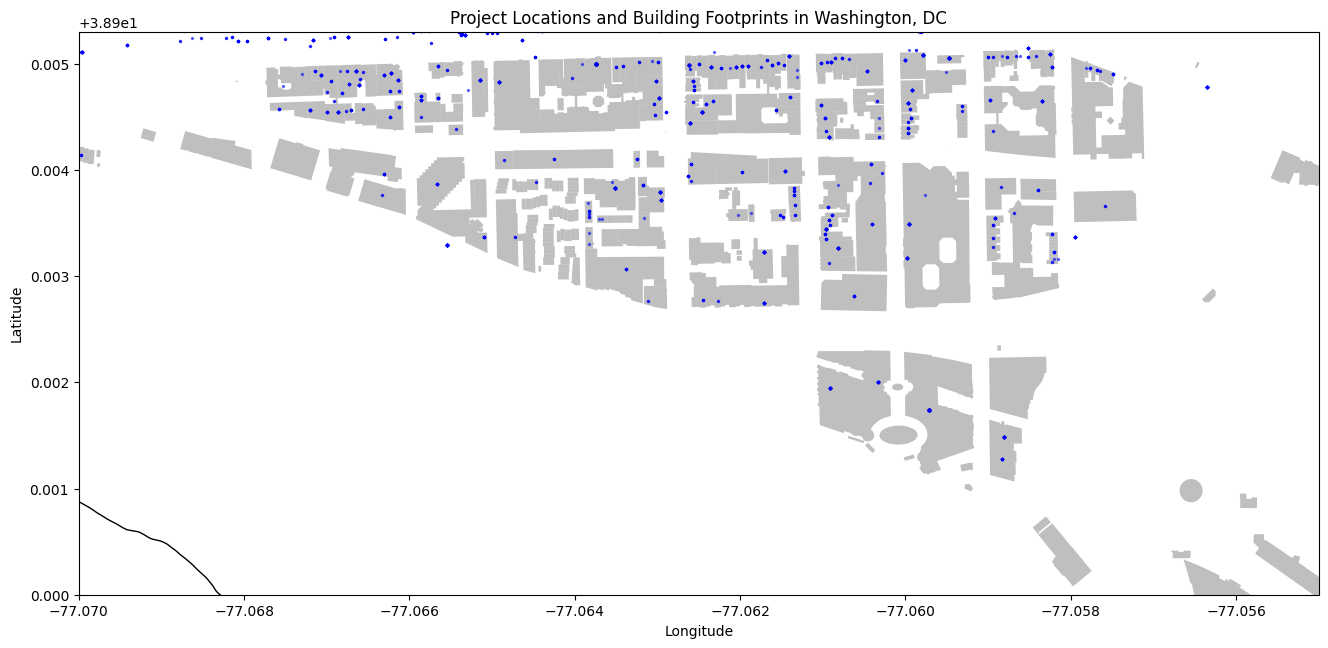

In [ ]:
# Plot the shapefile and the project locations
fig, ax = plt.subplots(figsize=(16, 10))
dc_boundary.plot(ax=ax, color='white', edgecolor='black')

# Plot the building footprints
waterfront_footprints.plot(ax=ax, color='grey', alpha=0.5)

# Plot the project locations
ax.scatter(og['lon'], og['lat'], c='blue', marker='o', alpha=0.5, s=2)

# Set the title and labels
plt.title('Project Locations and Building Footprints on the Georgetown Waterfront')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(-77.07, -77.055)
plt.ylim(38.9, 38.9053)

# Show the plot
plt.show()